In [2]:
def oblicz_odsetki(kapital, stopa, lata):
    odsetki = kapital * stopa * lata/100
    return odsetki

print(oblicz_odsetki(1000, 0.05, 2))
print(oblicz_odsetki(1000, 0.05, 3))


1.0
1.5


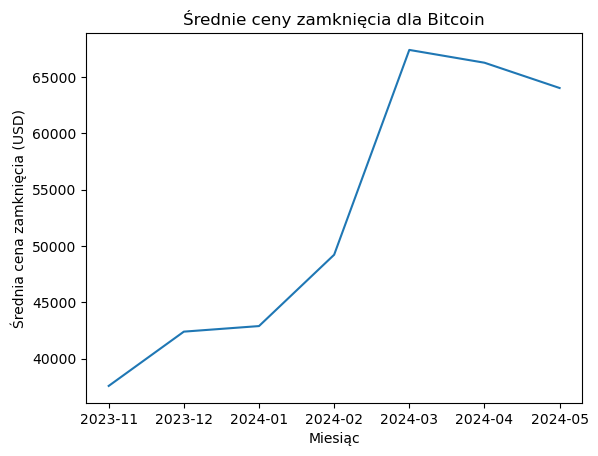

Najwyższa średnia cena zamknięcia: 2024-03 (67410.82 USD)
Najniższa średnia cena zamknięcia: 2023-11 (37588.65 USD)


In [6]:
# Analiza danych giełdowych
' Napisz program w Pythonie, który pobierze dane historyczne dotyczące ceny akcji lub kryptowalut z wybranego API (np. Alpha Vantage, CoinGecko) i przeprowadź podstawową analizę danych. '
' Program powinien wykonać następujące kroki: '
'1. Pobierz dane historyczne dotyczące ceny wybranej akcji lub kryptowaluty za ostatnie 6 miesięcy.' 
'2. Oblicz średnią cenę zamknięcia dla każdego miesiąca. '
'3. Wyświetl wykres przdstawiający miesięczne ceny zamknięcia.'  
'4. Znajdź miesiąc o najwyższej i najniższej średniej cenie zamknięcia.'

import requests
import pandas as pd
import matplotlib.pyplot as plt

# Funkcja pobierająca dane z API (CoinGecko)
def pobierz_dane(symbol):
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart?vs_currency=usd&days=180'
    response = requests.get(url)
    data = response.json()
    return data['prices']

# Przykład użycia
symbol = 'bitcoin'
dane = pobierz_dane(symbol)

# Przetwarzanie danych
df = pd.DataFrame(dane, columns=['timestamp', 'price'])
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('date', inplace=True)
df['month'] = df.index.to_period('M')
miesieczne_ceny = df.groupby('month')['price'].mean()

# Konwersacja na odpowiedni typ danych (float64)
miesieczne_ceny = miesieczne_ceny.astype('float64')

# Wykres
plt.plot(miesieczne_ceny.index.astype(str), miesieczne_ceny.values)
plt.xlabel('Miesiąc')
plt.ylabel('Średnia cena zamknięcia (USD)')
plt.title(f'Średnie ceny zamknięcia dla {symbol.capitalize()}')
plt.show()

# Miesiąc o najwyższej i najniższej średniej cenie zamknięcia
najwyzsza_cena = miesieczne_ceny.idxmax()
najnizsza_cena = miesieczne_ceny.idxmin()
print(f'Najwyższa średnia cena zamknięcia: {najwyzsza_cena} ({miesieczne_ceny[najwyzsza_cena]:.2f} USD)')
print(f'Najniższa średnia cena zamknięcia: {najnizsza_cena} ({miesieczne_ceny[najnizsza_cena]:.2f} USD)')

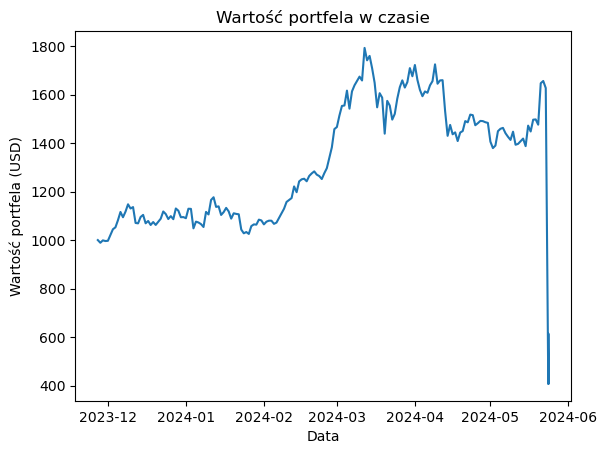

In [7]:
# Portfel inwestycyjny
'Napisz program, który stworzy symulację portfela inwestycyjnego złożonego z różnych akcji lub kryptowalut i obliczy jego wartość w czasie.'
'Program powinien wykonać następujące kroki:'
'1. Załaduj dane historyczne dotyczące cen kilku wybranych akcji lub kryprowalut.'
'2. Załóż, że początkowo inwestujes równą kwotę w każdą a nich'
'3. Oblicz wartość portfela na koniec każdego dnia przez ostatnie 6 miesięcy.'
'4. Wyświetl wykrrs przedstawiający wartośc portfela w czasie.'

import pandas as pd
import matplotlib.pyplot as plt

# Funkcja pobierająca dane z API (CoinGecko)
def pobierz_dane(symbol):
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart?vs_currency=usd&days=180'
    response = requests.get(url)
    data = response.json()
    return data['prices']

# Przykład użycia
symbole = ['bitcoin', 'ethereum', 'litecoin']
dane_portfela = {}

# Przykład użycia
symbole = ['bitcoin', 'ethereum', 'litecoin']
dane_portfela = {}

for symbol in symbole:
    dane = pobierz_dane(symbol)
    df = pd.DataFrame(dane, columns=['timestamp', 'price'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('date', inplace=True)
    df['price'] = df['price'].astype('float64')
    dane_portfela[symbol] = df['price' ]

# Tworzenie DataFrame z cenami
df_portfel = pd.DataFrame(dane_portfela)

# Założenie równych inwestycji
poczatkowa_inwestycja = 1000 # 10,000 USD
inwestycja_na_kazda = poczatkowa_inwestycja / len(symbole)
ilosci = inwestycja_na_kazda / df_portfel.iloc[0]

# Obliczenie wartości portfela w czasi
wartosc_portfela = df_portfel * ilosci
wartosc_portfela['total'] = wartosc_portfela.sum(axis=1)

# Wykres wartości portfela
plt.plot(wartosc_portfela.index, wartosc_portfela['total'])
plt.xlabel('Data')
plt.ylabel('Wartość portfela (USD)')
plt.title('Wartość portfela w czasie')
plt.show()

c:\Users\akarpinska2\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


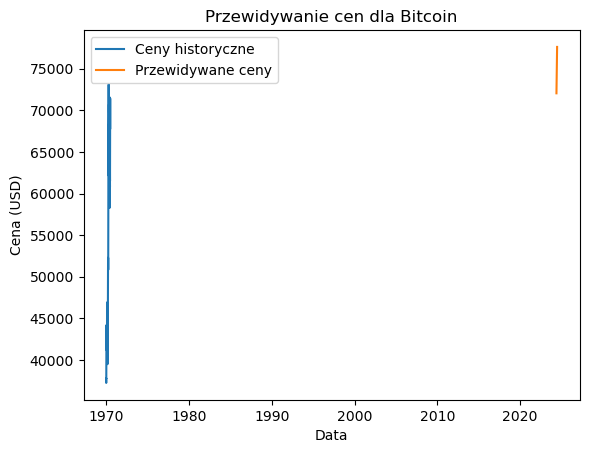

In [8]:
# Przewidywanie cen
'Napisz program, który wykorzysta prosty model regresji liniowej do przewidywania cen akcji lub kryptowalut na podstawie danych historycznych.'
'Program powinien wykonać następujące kroki:'
'1. Załaduj dane historyczne dotyczące ceny wybranej akcji lub kryptowaluty.'
'2. Wykorzytaj regresję liniową do stworzenia modelu predykcyjnego.'
'3. Przewidź ceny na następne 30 dni.'
'4. Wyświetl wykres z danymi historycznymi i przewidzianymi cenami.'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Funkcja pobierająca dane z API (CoinGecko)
def pobierz_dane(symbol):
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart?vs_currency=usd&days=180'
    response = requests.get(url)
    data = response.json()
    return data['prices']

# Przykład użycia
symbol = 'bitcoin'
dane = pobierz_dane(symbol)

# Przetwarzanie danych
df = pd.DataFrame(dane, columns=['timestamp', 'price'])
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('date', inplace=True)

# Przygotowanie danych do modelu
df['day'] = np.arange(len(df))
X = df[['day']]
y = df['price']

# Stworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Przewidywanie cen na następne 30 dni
dni_przyszle = np.arange(len(df), len(df) + 30).reshape(-1, 1)
przewidywane_ceny = model.predict(dni_przyszle)

# Wykres z danymi historycznymi i przewidywanymi cenami
plt.plot(df['day'], df['price'], label='Ceny historyczne')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), przewidywane_ceny, label='Przewidywane ceny')
plt.xlabel('Data')
plt.ylabel('Cena (USD)')
plt.title(f'Przewidywanie cen dla {symbol.capitalize()}')
plt.legend()
plt.show()

In [2]:
food = 'food'

for i in range(len(food)):
    print(food[i])
   

f
o
o
d


In [4]:
for i in food:
    print(i)

f
o
o
d


In [3]:
for piece in food:
    print(piece)

f
o
o
d


In [5]:
class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def bark(self):
        print('Woof!')

In [7]:
from typing import List, Tuple

def remove_gray_shades(colors: List[Tuple[int, int, int]]) -> List[Tuple[int, int, int]]:
    return [color for color in colors if color != (128, 128, 128)]

print(remove_gray_shades([(255, 0, 0), (128, 128, 128), (0, 255, 0)]))

[(255, 0, 0), (0, 255, 0)]


In [9]:
word = 'George'

print(word[-2])
print(len(word))

g
6


In [14]:
# lists

lego_sets = ['Lord of the Rings', 'Star Wars', 'Harry Potter']
print(lego_sets[:-1])
print(lego_sets[1:])

lego_sets.append('Wicked')
print(lego_sets)



['Lord of the Rings', 'Star Wars']
['Star Wars', 'Harry Potter']
['Lord of the Rings', 'Star Wars', 'Harry Potter', 'Wicked']


In [15]:
lego_sets = ['Lord of the Rings', 'Star Wars', 'Harry Potter']

for lego_set in lego_sets:
    if lego_set == 'Star Wars':
        print('Found Star Wars!')
    else:
        print('Not Star Wars!')

Not Star Wars!
Found Star Wars!
Not Star Wars!


In [16]:
lego_sets = int(input('How many lego sets do you have?'))

if lego_sets > 50:
    print('You have a lot of lego sets!')
elif lego_sets > 10:
    print('You have a few lego sets!')
elif lego_sets > 5 or lego_sets > 0:
    print('You have some lego sets!')
else:
    print('You have no lego sets!')


You have some lego sets!


In [17]:
lego_sets = ['Lord of the Rings', 'Star Wars', 'Harry Potter']

for i, lego_set in enumerate(lego_sets):
    print(f'{i}: {lego_set}')

for set in lego_sets:
    print(set, len(set))

0: Lord of the Rings
1: Star Wars
2: Harry Potter


In [18]:
for set in lego_sets:
    print(set, len(set))

Lord of the Rings 17
Star Wars 9
Harry Potter 12


In [31]:
# Iteracja po kopii słownika i usuwanie nieaktywnych użytkowników

users = {
    'Aragon': 'active',
    'Legolas': 'inactive',
    'Gimli': 'active'
}
for user, status in users.copy().items():
    if status == 'inactive':
        del users[user]

users.copy()
print(users)


{'Aragon': 'active', 'Gimli': 'active'}


In [32]:
for set in range(10):
    print(set)

0
1
2
3
4
5
6
7
8
9


In [33]:
for set in range(len(lego_sets)):
    print(lego_sets[set])

Lord of the Rings
Star Wars
Harry Potter


In [35]:
sum(range(len(lego_sets)))

3

In [37]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print(n, 'equals', x, '*', n//x)
            break
    else:
        print(n, 'is a prime number')

2 is a prime number
3 is a prime number
4 equals 2 * 2
5 is a prime number
6 equals 2 * 3
7 is a prime number
8 equals 2 * 4
9 equals 3 * 3


In [38]:
for num in range(2, 10):
    if num % 2 == 0:
        print('Found an even number', num)
        continue
    print('Found a number', num)

Found an even number 2
Found a number 3
Found an even number 4
Found a number 5
Found an even number 6
Found a number 7
Found an even number 8
Found a number 9


In [ ]:
while True:
    pass

In [41]:
def fibonacci(n):
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b

fibonacci(1000)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 

In [43]:
def fib2(n):
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a + b
    return result

f100 = fib2(100)
f100

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [45]:
def ask_ok(prompt, retries=4, reminder='Please try again!'):
    while True:
        ok = input(prompt)
        if ok in ('y', 'ye', 'yes'):
            return True
        if ok in ('n', 'no', 'nop', 'nope'):
            return False
        retries = retries - 1
        if retries < 0:
            raise ValueError('invalid user response')
        print(reminder)

ask_ok('Do you really want to quit?')

True

In [48]:
def cheeseshop(kind, *arguments, **keywords):
    print("-- Do you have any", kind, "?")
    print("-- I'm sorry, we're all out of", kind)
    for arg in arguments:
        print(arg)
    print("-" * 40)
    for kw in keywords:
        print(kw, ":", keywords[kw])

cheeseshop("Limburger")

-- Do you have any Limburger ?
-- I'm sorry, we're all out of Limburger
----------------------------------------


In [49]:
def concat(*args, sep="/"):
    return sep.join(args)

concat("earth", "mars", "venus")
'earth/mars/venus'
concat("earth", "mars", "venus", sep=".")
'earth.mars.venus'

'earth.mars.venus'

In [52]:
list(range(3, 6))            # normal call with separate arguments
[3, 4, 5]
args = [3, 6]
list(range(*args))            # call with arguments unpacked from a list
[3, 4, 5]

[3, 4, 5]

In [57]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)

print(f(0), f(1), f(2), f(3))


42 43 44 45


In [58]:
fruits = ['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']
fruits.count('apple')
2
fruits.count('tangerine')
0
fruits.index('banana')
3
fruits.index('banana', 4)  # Find next banana starting a position 4
6
fruits.reverse()
fruits
['banana', 'apple', 'kiwi', 'banana', 'pear', 'apple', 'orange']
fruits.append('grape')
fruits
['banana', 'apple', 'kiwi', 'banana', 'pear', 'apple', 'orange', 'grape']
fruits.sort()
fruits
['apple', 'apple', 'banana', 'banana', 'grape', 'kiwi', 'orange', 'pear']
fruits.pop()
'pear'

'pear'

In [59]:
print(type(0x2A))

<class 'int'>


In [60]:
tel = {'jack': 4098, 'sape': 4139}
tel['guido'] = 4127
tel
{'jack': 4098, 'sape': 4139, 'guido': 4127}
tel['jack']
4098
del tel['sape']
tel['irv'] = 4127
tel
{'jack': 4098, 'guido': 4127, 'irv': 4127}
list(tel)
['jack', 'guido', 'irv']
sorted(tel)
['guido', 'irv', 'jack']
'guido' in tel
True
'jack' not in tel
False

False

In [61]:
knights ={ 'gallahad': 'the pure', 'robin': 'the brave'}
for k, v in knights.items():
    print(k, v)


gallahad the pure
robin the brave


In [62]:
for i, v in enumerate(['tic', 'tac', 'toe']):
    print(i, v)

0 tic
1 tac
2 toe


In [63]:
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
for q, a in zip(questions, answers):
   print('What is your {0}?  It is {1}.'.format(q, a))

What is your name?  It is lancelot.
What is your quest?  It is the holy grail.
What is your favorite color?  It is blue.


In [64]:
for i in reversed(range(1, 10, 2)):
    print(i)

9
7
5
3
1


In [68]:
import math
raw_data = [56.2, float('NaN'), 51.7, 55.3, 52.5, float('NaN'), 47.8]
filtered_data = []
for value in raw_data:
    if not math.isnan(value):
        filtered_data.append(value)

filtered_data

[56.2, 51.7, 55.3, 52.5, 47.8]

In [70]:
a = int(input())
b = int(input())

integer_division = a // b

float_division = a / b

print(integer_division)
print(float_division)

0
0.6666666666666666


In [71]:
a = int(input())
b = int(input())
    
sum_ab = a + b
difference_ab = a - b
product_ab = a * b
    
print(sum_ab)
print(difference_ab)
print(product_ab)

7
-1
12


In [75]:
n = int(input())

for i in range(1, n+1):
    print(i, end='')

1234

In [76]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops! That was no valid number. Try again...")

In [77]:
import sys

try:
    f = open('myfile.txt')
    s = f.readline()
    i = int(s.strip())
except OSError as err:
    print("OS error: {0}".format(err))
except ValueError:
    print("Could not convert data to an integer.")
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

OS error: [Errno 2] No such file or directory: 'myfile.txt'


In [78]:
for arg in sys.argv[1:]:
    try:
        f = open(arg, 'r')
    except OSError:
        print('cannot open', arg)
    else:
        print(arg, 'has', len(f.readlines()), 'lines')
        f.close()

cannot open --f=c:\Users\akarpinska2\AppData\Roaming\jupyter\runtime\kernel-v2-35072lrmCzr2evJSk.json
